Objectif principal du projet:
Analyser et modéliser les données criminelles afin de ressortir les tendances, comprendre les facteurs lies      aux crimes et prédire certains comportements criminels.

## Lecture du jeu de données

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Affichage des premières observations du jeu de données
df_original = pd.read_csv("Crime_Data_from_2020_to_Present.csv", sep=",")
df = df_original.copy()
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
#Valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values) 


Valeurs manquantes par colonne :
 DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145262
Vict Age               0
Vict Sex          138445
Vict Descent      138456
Premis Cd             14
Premis Desc          585
Weapon Used Cd    656471
Weapon Desc       656471
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          913763
Crm Cd 3          980327
Crm Cd 4          982574
LOCATION               0
Cross Street      830789
LAT                    0
LON                    0
dtype: int64


##	Diagnostic des données

##### Analyse structurelle du jeu de données

In [4]:
# Information sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982638 entries, 0 to 982637
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           982638 non-null  int64  
 1   Date Rptd       982638 non-null  object 
 2   DATE OCC        982638 non-null  object 
 3   TIME OCC        982638 non-null  int64  
 4   AREA            982638 non-null  int64  
 5   AREA NAME       982638 non-null  object 
 6   Rpt Dist No     982638 non-null  int64  
 7   Part 1-2        982638 non-null  int64  
 8   Crm Cd          982638 non-null  int64  
 9   Crm Cd Desc     982638 non-null  object 
 10  Mocodes         837376 non-null  object 
 11  Vict Age        982638 non-null  int64  
 12  Vict Sex        844193 non-null  object 
 13  Vict Descent    844182 non-null  object 
 14  Premis Cd       982624 non-null  float64
 15  Premis Desc     982053 non-null  object 
 16  Weapon Used Cd  326167 non-null  float64
 17  Weapon Des

#####	Description statistique des variables

In [5]:
# Variables numériques
df.describe().round(2)

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.826380e+05,982638.00,982638.00,982638.00,982638.00,982638.00,982638.00,982624.00,326167.00,982627.00,68875.00,2311.00,64.00,982638.00,982638.00
mean,2.197437e+08,1338.95,10.70,1116.46,1.40,500.82,29.08,306.13,363.84,500.58,958.17,984.20,991.22,34.00,-118.08
std,1.294954e+07,651.54,6.11,610.89,0.49,206.21,21.97,219.05,123.68,206.01,110.23,51.49,27.07,1.64,5.67
min,8.170000e+02,1.00,1.00,101.00,1.00,110.00,-4.00,101.00,101.00,110.00,210.00,310.00,821.00,0.00,-118.67
25%,2.106089e+08,900.00,5.00,587.00,1.00,331.00,0.00,101.00,311.00,331.00,998.00,998.00,998.00,34.01,-118.43
50%,2.208146e+08,1420.00,11.00,1141.00,1.00,442.00,30.00,203.00,400.00,442.00,998.00,998.00,998.00,34.06,-118.32
75%,2.309153e+08,1900.00,16.00,1617.00,2.00,626.00,44.00,501.00,400.00,626.00,998.00,998.00,998.00,34.16,-118.27
max,2.499253e+08,2359.00,21.00,2199.00,2.00,956.00,120.00,976.00,516.00,956.00,999.00,999.00,999.00,34.33,0.00


In [6]:
# Variables catégorielles
df.describe(include=['object', 'category'])

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street
count,982638,982638,982638,982638,837376,844193,844182,982053,326167,982637,982638,982638,151849
unique,1735,1735,21,140,309364,5,20,306,79,6,6,66265,10326
top,02/02/2023 12:00:00 AM,01/01/2020 12:00:00 AM,Central,VEHICLE - STOLEN,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST,BROADWAY
freq,929,1156,67774,110804,40829,396769,292430,253587,174413,784963,784963,2522,2467


In [7]:
# je veux voir les valeurs de la colonne Premis Desc je veux voir toutes les valeurs uniques et leur fréquence  
#col = 'Premis Desc'
#unique_values = sorted(df[col].dropna().unique())
#for v in unique_values:
#   print(v)
#with open('premis_list.txt', 'w', encoding='utf-8') as f:
#    for v in unique_values:
#        f.write(str(v) + "\n")

In [8]:
# je veux les colonnes de mon df
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [9]:
# Je veux voir les valeurs de LON et LAT
print(df[['LON', 'LAT']])   


             LON      LAT
0      -118.3506  34.0375
1      -118.2628  34.0444
2      -118.3002  34.0210
3      -118.4387  34.1576
4      -118.3277  34.0944
...          ...      ...
982633 -118.3066  34.0617
982634 -118.3284  34.0362
982635 -118.2460  34.0685
982636 -118.2868  34.0215
982637 -118.4510  34.1961

[982638 rows x 2 columns]


#####	Analyse univariée des variables pertinentes

array([[<Axes: title={'center': 'AREA'}>,
        <Axes: title={'center': 'Part 1-2'}>,
        <Axes: title={'center': 'Crm Cd'}>],
       [<Axes: title={'center': 'Vict Age'}>,
        <Axes: title={'center': 'Premis Cd'}>,
        <Axes: title={'center': 'Weapon Used Cd'}>],
       [<Axes: title={'center': 'Crm Cd 2'}>,
        <Axes: title={'center': 'Crm Cd 3'}>,
        <Axes: title={'center': 'Crm Cd 4'}>]], dtype=object)

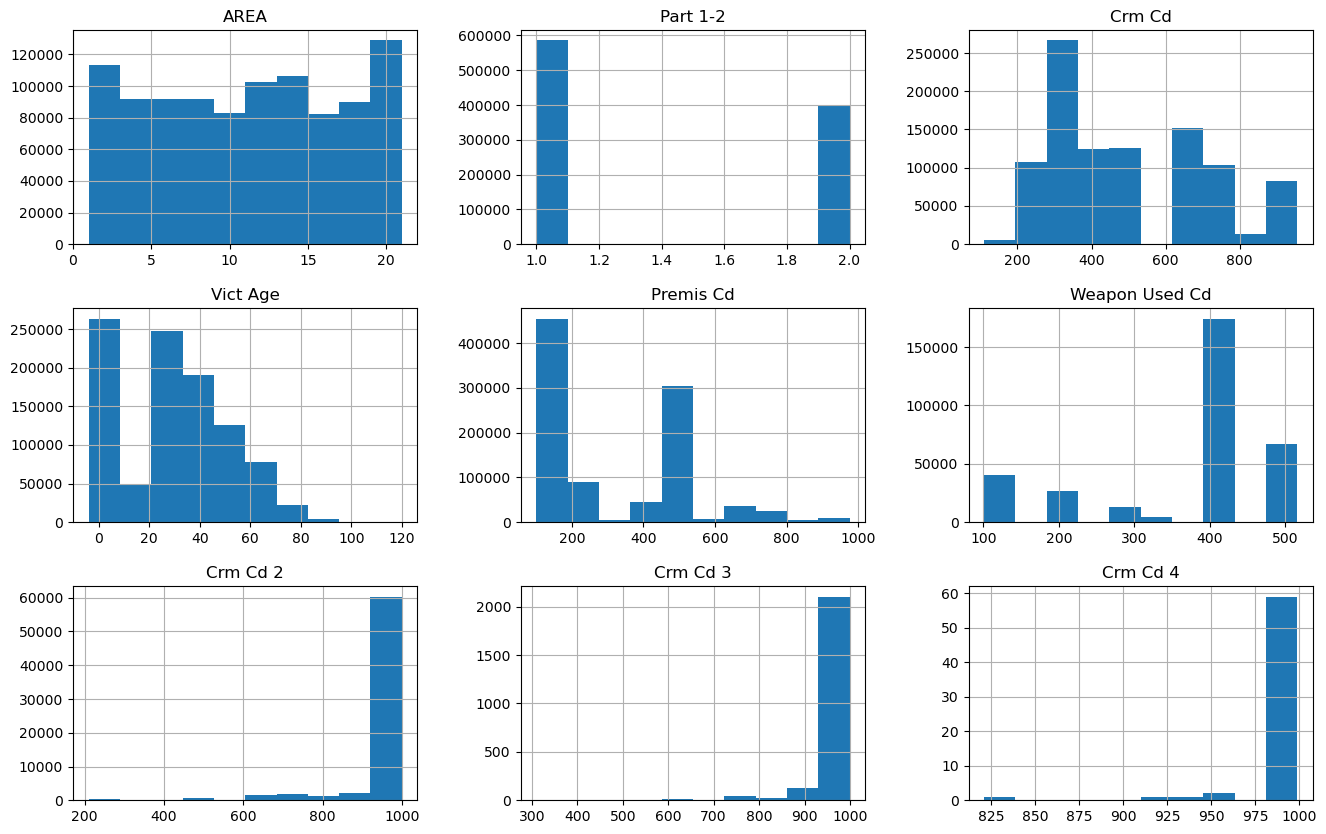

In [10]:
# Variables numériques pertinentes
#colonnes_exclues = ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'Rpt Dist No', 'LAT', 'LON', 'occ_year', 'occ_month', 'occ_hour']
colonnes_exclues = ['DR_NO', 'Date Rptd', 'Rpt Dist No', 'DATE OCC', 'TIME OCC', 'Crm Cd 1', 'LAT', 'LON', 'Signaling Delay']
df_numeriques = df.drop(columns=colonnes_exclues, errors='ignore')
df_numeriques.hist(figsize=(16,10))

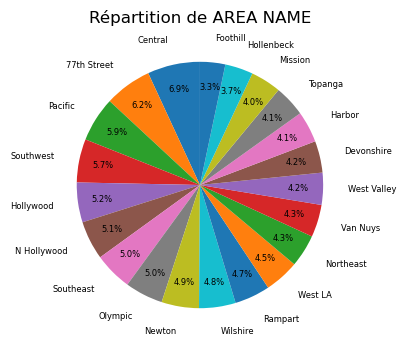

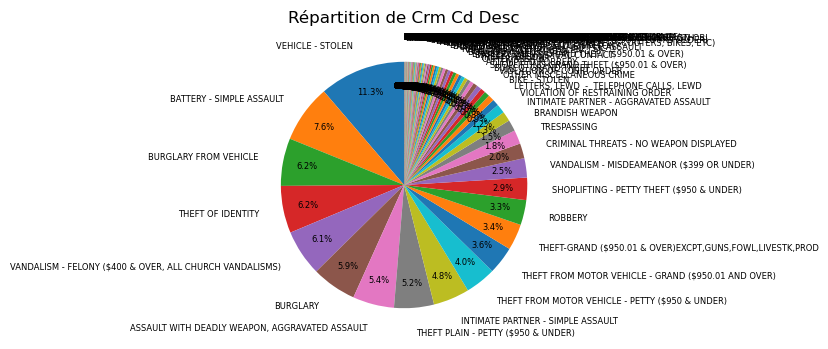

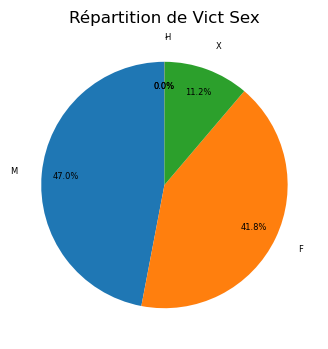

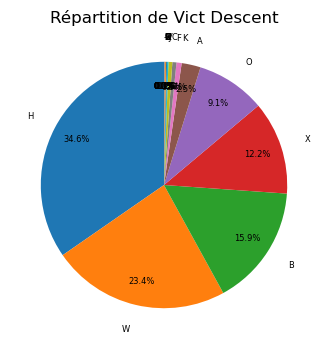

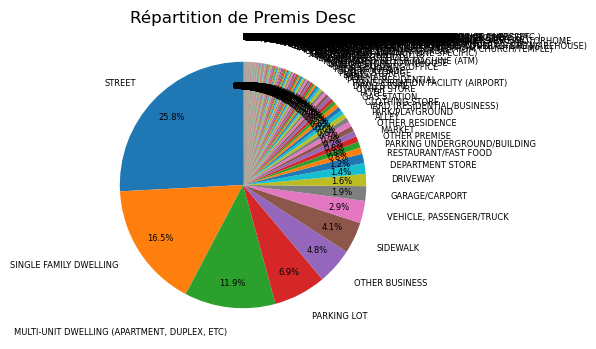

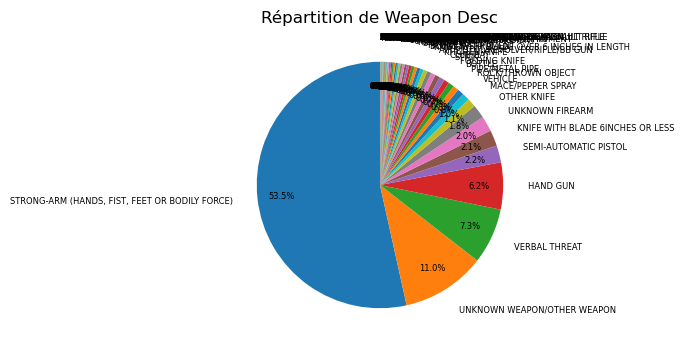

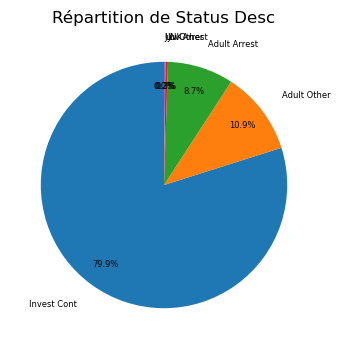

In [11]:
# Variables catégorielles pertinentes
df_categorielles = df[['AREA NAME', 'Crm Cd Desc', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Status Desc']]
#df_categorielles = df.select_dtypes(include=["object", "category"])

for col in df_categorielles.columns:
    plt.figure(figsize=(4, 4))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.2, textprops={'fontsize': 6})
    plt.title(f"Répartition de {col}")
    plt.ylabel("")
    plt.show()

##### Vérification des valeurs manquantes

In [12]:
# Vérification des valeurs manquantes
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           145262
Vict Age               0
Vict Sex          138445
Vict Descent      138456
Premis Cd             14
Premis Desc          585
Weapon Used Cd    656471
Weapon Desc       656471
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          913763
Crm Cd 3          980327
Crm Cd 4          982574
LOCATION               0
Cross Street      830789
LAT                    0
LON                    0
dtype: int64

##### Vérification des doublons

In [13]:
# Vérification des doublons
df.duplicated().sum()

0

##### Vérification des valeurs aberrantes

In [14]:
# Vérification des valeurs aberrantes
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


def detect_all_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include='number').columns
    outlier_dict = {}

    for col in numeric_cols:
        outliers = detect_outliers_iqr(df, col)
        outlier_dict[col] = outliers
        print(f"\n Variable : {col}")
        print(f"Nombre de valeurs aberrantes : {len(outliers)}")
        if not outliers.empty:
            print(outliers[[col]].head())

    return outlier_dict

Outliers = detect_all_outliers_iqr(df)



 Variable : DR_NO
Nombre de valeurs aberrantes : 6
           DR_NO
39881        817
69560   10304468
268020      2113
581012      2203
734432      2315

 Variable : TIME OCC
Nombre de valeurs aberrantes : 0

 Variable : AREA
Nombre de valeurs aberrantes : 0

 Variable : Rpt Dist No
Nombre de valeurs aberrantes : 0

 Variable : Part 1-2
Nombre de valeurs aberrantes : 0

 Variable : Crm Cd
Nombre de valeurs aberrantes : 0

 Variable : Vict Age
Nombre de valeurs aberrantes : 1
        Vict Age
196646       120

 Variable : Premis Cd
Nombre de valeurs aberrantes : 0

 Variable : Weapon Used Cd
Nombre de valeurs aberrantes : 40502
      Weapon Used Cd
208            102.0
217            106.0
259            106.0
501            106.0
1183           106.0

 Variable : Crm Cd 1
Nombre de valeurs aberrantes : 0

 Variable : Crm Cd 2
Nombre de valeurs aberrantes : 13773
    Crm Cd 2
11     821.0
12     860.0
21     860.0
22     860.0
72     860.0

 Variable : Crm Cd 3
Nombre de valeurs aberra

##### Vérification des incohérences, erreurs typographiques, et incompatibilités de format

In [15]:
for col in df.columns:
    print(df[col].value_counts(dropna=False))
    print()

DR_NO
190326475    1
232116531    1
231110007    1
231224930    1
232111256    1
            ..
211413466    1
211219529    1
211506849    1
212111158    1
240910892    1
Name: count, Length: 982638, dtype: int64

Date Rptd
02/02/2023 12:00:00 AM    929
02/03/2023 12:00:00 AM    927
01/03/2023 12:00:00 AM    913
05/02/2022 12:00:00 AM    909
04/04/2022 12:00:00 AM    883
                         ... 
05/26/2024 12:00:00 AM    201
07/04/2024 12:00:00 AM    193
09/29/2024 12:00:00 AM    188
08/11/2024 12:00:00 AM    184
07/20/2024 12:00:00 AM    177
Name: count, Length: 1735, dtype: int64

DATE OCC
01/01/2020 12:00:00 AM    1156
01/01/2023 12:00:00 AM    1149
12/02/2022 12:00:00 AM    1132
02/01/2023 12:00:00 AM    1093
10/01/2022 12:00:00 AM    1079
                          ... 
09/27/2024 12:00:00 AM     190
09/26/2024 12:00:00 AM     183
09/28/2024 12:00:00 AM     181
09/29/2024 12:00:00 AM     128
09/30/2024 12:00:00 AM      48
Name: count, Length: 1735, dtype: int64

TIME OCC
1200 

##	Nettoyage des données

##### Gestion des incohérences, erreurs typographiques, et incompatibilités de format

In [16]:
# Correction des âges négatifs en positifs
df.loc[df['Vict Age'] < 0, 'Vict Age'] = df.loc[df['Vict Age'] < 0, 'Vict Age'].abs()

In [17]:
# Harmonisation du format des dates en datetime 
date_cols = ['Date Rptd', 'DATE OCC']
for c in date_cols:
    df[c] = pd.to_datetime(df[c], format='%m/%d/%Y %I:%M:%S %p')
# errors='coerce'

df[['Date Rptd', 'DATE OCC']].value_counts(dropna=False)

Date Rptd   DATE OCC  
2023-02-02  2023-02-02    522
2023-02-03  2023-02-03    485
2022-12-02  2022-12-02    470
2022-06-02  2022-06-02    460
2022-05-02  2022-05-02    443
                         ... 
2022-12-10  2022-10-21      1
            2022-10-24      1
2021-06-18  2020-08-04      1
            2020-05-21      1
2020-05-11  2020-04-06      1
Name: count, Length: 89995, dtype: int64

In [18]:
# Gestion des erreurs dans la variable "Vict Sex"
df['Vict Sex'] = df['Vict Sex'].replace("H", "M")
df['Vict Sex'] = df['Vict Sex'].replace("-", "X")

df['Vict Sex'].value_counts(dropna=False)

Vict Sex
M      396881
F      352750
NaN    138445
X       94562
Name: count, dtype: int64

In [19]:
# Gestion des erreurs dans la variable "Vict Descent"
df['Vict Descent'] = df['Vict Descent'].replace("-", "Unknow")

df['Vict Descent'].value_counts(dropna=False)

Vict Descent
H         292430
W         197125
NaN       138456
B         134182
X         103330
O          76711
A          21028
K           5678
F           4555
C           4265
J           1490
V           1117
I            968
Z            529
P            277
U            211
D             86
G             72
L             71
S             55
Unknow         2
Name: count, dtype: int64

In [20]:
# Gestion de la correspondance entre les variables "Crm Cd" et "Crm Cd 1"
df['Crm Cd 1'] = df['Crm Cd']
#df.drop("Crm Cd 1", axis=1, inplace=True)

In [21]:
# Gestion de la correspondance entre "Premis Cd" et les valeurs vide de "Premis Desc" 
mapping = df.dropna(subset=['Premis Desc']).drop_duplicates('Premis Cd').set_index('Premis Cd')['Premis Desc']  # Étape 1 : créer un dictionnaire Code → Description à partir des lignes non manquantes
df['Premis Desc'] = df['Premis Desc'].fillna(df['Premis Cd'].map(mapping))   # Étape 2 : remplir les descriptions manquantes à partir de ce dictionnaire

df[['Premis Cd', 'Premis Desc']].isnull().sum()

Premis Cd       14
Premis Desc    585
dtype: int64

##### Gestion des valeurs manquantes  
Weapons used cd (66.807%), Weapons Desc (66,807%), Statut (0.000102%), Crm Cd1 (0.001119%), 
Crm Cd2 (92.99%), Crm Cd3 (99.76%), Crm Cd4 (99.99%), Cross-street (84.54%)

In [22]:
# Imputation par la valeur <<X>> (supposé désigné Inconnu) pour la variable "Vict Sex"
df['Vict Sex'] = df['Vict Sex'].fillna("X")

In [23]:
# Imputation par la valeur <<0>> (Non Applicable) pour les variables Crm Cd 2 à 4
df['Crm Cd 2'] = df['Crm Cd 2'].fillna(0)
df['Crm Cd 3'] = df['Crm Cd 3'].fillna(0)
df['Crm Cd 4'] = df['Crm Cd 4'].fillna(0)

In [24]:
# Suppression de la seule valeur manquante de la variable "Statut"
df['Status'].dropna(inplace=True)

In [25]:
# Imputation par une constante pour toutes les autres variables
df['Mocodes'] = df['Mocodes'].fillna(0)

df['Vict Descent'] = df['Vict Descent'].fillna("Unknow")

df['Premis Cd'] = df['Premis Cd'].fillna(0)
df['Premis Desc'] = df['Premis Desc'].fillna("Unknow")

df['Weapon Used Cd'] = df['Weapon Used Cd'].fillna(0)
df['Weapon Desc'] = df['Weapon Desc'].fillna("Unknow")

df['Cross Street'] = df['Cross Street'].fillna("Unknow")

df.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            1
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

##### Gestion des valeurs aberrantes  
DR_NO, Vict_Age (0.05%), Weapon Used Cd (), Crm Cd 2 (), Crm Cd 3 (), Crm Cd 4 (), LAT() et LON()  
La variable Vict Age est la seule sur laquelle cette gestion fait sens d’après notre jeu de données

In [26]:
# La proportion étant inférieur a 5%, nous choisissons de les supprimer
Q1 = df['Vict Age'].quantile(0.25)
Q3 = df['Vict Age'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df['Vict Age'] >= lower_limit) & (df['Vict Age'] <= upper_limit)]

df['Vict Age'].value_counts(dropna=False).sort_index(ascending=False)

Vict Age
99       352
98        71
97        72
96        95
95        99
       ...  
4        521
3        504
2        455
1         96
0     259601
Name: count, Length: 100, dtype: int64

##### Gestion des doublons  

In [27]:
df.duplicated().sum() # Aucun doublons présents dans notre jeu de données

0

##### Transformation des données 

In [28]:
# Création d'une variable "Signaling Delay"
df['Signaling Delay'] = (df['Date Rptd'] - df['DATE OCC']).dt.days
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Signaling Delay
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Adult Arrest,510,998.0,0.0,0.0,1900 S LONGWOOD AV,Unknow,34.0375,-118.3506,0
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330,998.0,0.0,0.0,1000 S FLOWER ST,Unknow,34.0444,-118.2628,1
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,Invest Cont,480,0.0,0.0,0.0,1400 W 37TH ST,Unknow,34.0210,-118.3002,7
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Invest Cont,343,0.0,0.0,0.0,14000 RIVERSIDE DR,Unknow,34.1576,-118.4387,1156
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Invest Cont,354,0.0,0.0,0.0,1900 TRANSIENT,Unknow,34.0944,-118.3277,731


In [29]:
# Création d'une variable "Daily Periods"
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4) # Convertion de TIME OCC en une chaîne à 4 chiffres
df['TIME OCC datetime'] = pd.to_datetime(df['TIME OCC'], format="%H%M", errors='coerce') # convertion de TIME OCC en format d'heure normal 24h
df['Hour'] = df['TIME OCC datetime'].dt.hour # Extraction de l'heure en format numérique (0 à 23)
df['Daily Periods'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24] , labels=["Night", "Morning", "Afternoon", "Evening"], right=False, include_lowest=True)

df.drop(['TIME OCC datetime', 'Hour'], axis=1, inplace=True)
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Signaling Delay,Daily Periods
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,510,998.0,0.0,0.0,1900 S LONGWOOD AV,Unknow,34.0375,-118.3506,0,Evening
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,330,998.0,0.0,0.0,1000 S FLOWER ST,Unknow,34.0444,-118.2628,1,Evening
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,480,0.0,0.0,0.0,1400 W 37TH ST,Unknow,34.0210,-118.3002,7,Afternoon
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,343,0.0,0.0,0.0,14000 RIVERSIDE DR,Unknow,34.1576,-118.4387,1156,Evening
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,354,0.0,0.0,0.0,1900 TRANSIENT,Unknow,34.0944,-118.3277,731,Afternoon


In [30]:
# Création d'une variable "Season"
df['Month'] = df['DATE OCC'].dt.month
season_map = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Autumn", 10: "Autumn", 11: "Autumn"
}
df['Season'] = df['Month'].map(season_map)

df.drop(['Month'], axis=1, inplace=True)
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Signaling Delay,Daily Periods,Season
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,998.0,0.0,0.0,1900 S LONGWOOD AV,Unknow,34.0375,-118.3506,0,Evening,Spring
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,998.0,0.0,0.0,1000 S FLOWER ST,Unknow,34.0444,-118.2628,1,Evening,Winter
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,0.0,0.0,0.0,1400 W 37TH ST,Unknow,34.0210,-118.3002,7,Afternoon,Autumn
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,0.0,0.0,0.0,14000 RIVERSIDE DR,Unknow,34.1576,-118.4387,1156,Evening,Spring
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,0.0,0.0,0.0,1900 TRANSIENT,Unknow,34.0944,-118.3277,731,Afternoon,Summer


In [31]:
# Gestion de la valeur 0 pour age inconnu
condition = (df['Vict Age'] == 0) & (df['Vict Sex'] == 'X') & (df['Vict Descent'] == 'Unknow')
df.loc[condition, 'Vict Age'] = 111

In [32]:
# Création d'une variable "Age Group"
bins = [0, 15, 20, 65, 100, 111]
labels = ["Children", "Adolescents", "Adults", "Seniors", "Unknow"]
df['Age Group'] = pd.cut(df['Vict Age'], bins=bins , labels=labels, right=False, include_lowest=True)
#df['Age Group'] = pd.cut(df['Vict Age'], bins=bins , labels=labels)
df.head(10)
df['Age Group'].value_counts()

Age Group
Adults         626989
Children       134996
Seniors         54750
Adolescents     27486
Unknow              0
Name: count, dtype: int64

##	Analyse exploratoire

In [33]:
# Rapport statistique detaillé du jeu de données sous page HTML
""""
from ydata_profiling import ProfileReport
profile = ProfileReport(df, explorative=True)
profile.to_file("rapport.html")
"""

'"\nfrom ydata_profiling import ProfileReport\nprofile = ProfileReport(df, explorative=True)\nprofile.to_file("rapport.html")\n'

#### Statistique descriptives

In [34]:
# Statistique descriptives sur les données : variables numériques
df.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
DR_NO,982637.0,219743678.77,817.0,210608858.0,220814562.0,230915339.0,249925282.0,12949537.34
Date Rptd,982637,2022-05-05 10:43:18.841282048,2020-01-01 00:00:00,2021-04-10 00:00:00,2022-05-22 00:00:00,2023-06-07 00:00:00,2024-09-30 00:00:00,NaN
DATE OCC,982637,2022-04-23 14:05:40.811102976,2020-01-01 00:00:00,2021-03-27 00:00:00,2022-05-08 00:00:00,2023-05-26 00:00:00,2024-09-30 00:00:00,NaN
AREA,982637.0,10.7,1.0,5.0,11.0,16.0,21.0,6.11
Rpt Dist No,982637.0,1116.46,101.0,587.0,1141.0,1617.0,2199.0,610.89
Part 1-2,982637.0,1.4,1.0,1.0,1.0,2.0,2.0,0.49
Crm Cd,982637.0,500.82,110.0,331.0,442.0,626.0,956.0,206.21
Vict Age,982637.0,44.72,0.0,25.0,37.0,57.0,111.0,32.62
Premis Cd,982637.0,306.13,0.0,101.0,203.0,501.0,976.0,219.06
Weapon Used Cd,982637.0,120.77,0.0,0.0,0.0,309.0,516.0,185.56


In [35]:
# Statistique descriptives sur les données : variables catégorielles
df.describe(include=['object', 'category'])

,TIME OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,Daily Periods,Season,Age Group
count,982637,982637,982637,982637,982637,982637,982637,982637,982636,982637,982637,982637,982637,982637,844221
unique,1439,21,140,309365,3,20,307,80,6,6,66265,10327,4,4,4
top,1200,Central,VEHICLE - STOLEN,0,M,H,STREET,Unknow,IC,Invest Cont,800 N ALAMEDA ST,Unknow,Afternoon,Spring,Adults
freq,34477,67774,110804,145262,396881,292430,253586,656471,784962,784962,2522,830788,319762,254063,626989


#### 1- Tendances temporelles et géographiques de la criminalité

In [36]:
# Extraction des composantes temporelles
df['occ_date'] = df['DATE OCC'].dt.date
df['occ_year'] = df['DATE OCC'].dt.year
df['occ_month'] = df['DATE OCC'].dt.month
df['occ_dayofweek'] = df['DATE OCC'].dt.day_name()
df['occ_hour'] = pd.to_datetime(df['TIME OCC'].astype(str).str.zfill(4), format='%H%M').dt.hour

In [37]:
# Attaques quotidiennes ou mensuelles
ts_daily = df.groupby('DATE OCC').size().rename('count')
ts_monthly = df.groupby(['occ_year','occ_month']).size().rename('count').reset_index()
#ts_monthly['date'] = pd.to_datetime(ts_monthly[['occ_year','occ_month']].assign(day=1))
ts_monthly['date'] = pd.to_datetime(
    ts_monthly.rename(columns={'occ_year': 'year', 'occ_month': 'month'})[['year', 'month']]
    .assign(day=1)
)

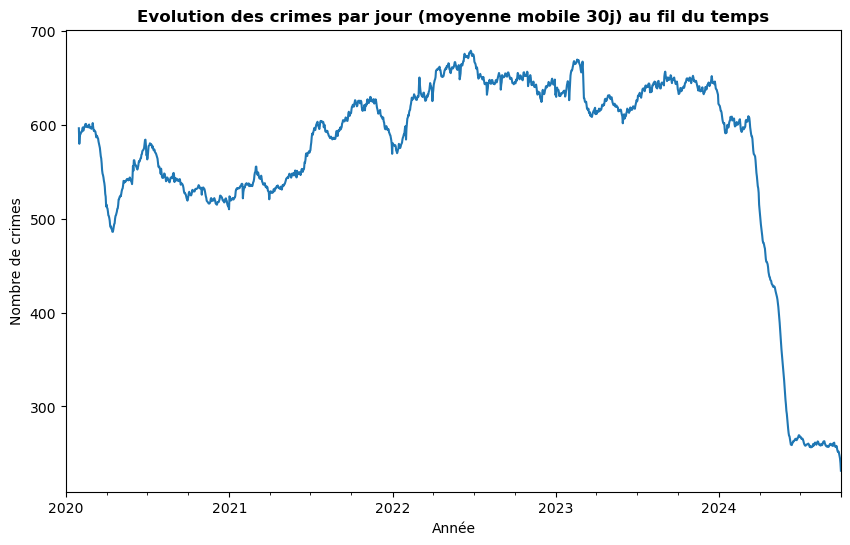

'\nLes crimes évoluaient en dent de scie et de manière croissante entre début 2020 et milieu 2022. \nEnsuite, ils sont restés constants et toujours en dent de scie entre milieu 2022 et début 2024. \nEt, enfin ils ont commencé a chuté à partir de début 2024.\n'

In [38]:
#=== Crimes par jour (moyenne mobile 30j) ===#

plt.figure(figsize=(10,6))
ts_daily.rolling(30).mean().plot()   # moyenne glissante 30 jours
plt.title('Evolution des crimes par jour (moyenne mobile 30j) au fil du temps', fontweight='bold')
plt.xlabel('Année')
plt.ylabel('Nombre de crimes')
plt.show()

#La moyenne mobile sur 30 jours (aussi appelée moyenne glissante) est une moyenne calculée sur une fenêtre temporelle qui se déplace jour après jour.
#Elle permet de lisser les variations quotidiennes pour mieux voir les tendances générales.

"""
Les crimes évoluaient en dent de scie et de manière croissante entre début 2020 et milieu 2022. 
Ensuite, ils sont restés constants et toujours en dent de scie entre milieu 2022 et début 2024. 
Et, enfin ils ont commencé a chuté à partir de début 2024.
"""

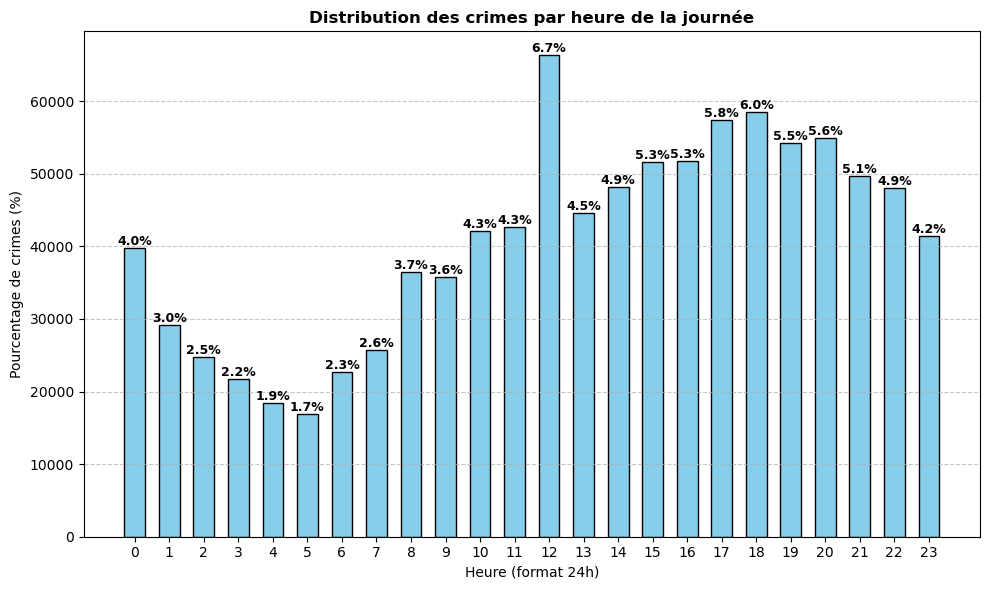

'\nLe graphique montre que l’activité criminelle est minimale entre 3 h et 6 h,\nelle augmente progressivement dès 7 h et atteint son pic maximal vers 12 h.\nL’après-midi (13 h–18 h) reste une plage horaire très active, avec d’un second sommet entre 17 h et 20 h. \nNeamoins, les crimes diminuent après 21 h mais demeurent présents.\n'

In [39]:
#=== Distribution des crimes par heures de la journée ===#

# Compter les occurrences par heure
counts = df['occ_hour'].value_counts().sort_index()
heures = counts.index
valeurs = counts.values
total = valeurs.sum()

# Bar plot avec espacement
plt.figure(figsize=(10,6))
bars = plt.bar(heures, valeurs, width=0.6, color='skyblue', edgecolor='black')
plt.xticks(range(0,24))
plt.title("Distribution des crimes par heure de la journée", fontweight='bold')
plt.xlabel("Heure (format 24h)")
plt.ylabel("Pourcentage de crimes (%)")

for bar in bars: # Ajouter les étiquettes en pourcentage sur chaque barre
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f"{percent:.1f}%",
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)   # ajouter une grille horizontale pour mieux visualiser les pourcentages

plt.tight_layout()
plt.show()

"""
Le graphique montre que l’activité criminelle est minimale entre 3 h et 6 h,
elle augmente progressivement dès 7 h et atteint son pic maximal vers 12 h.
L’après-midi (13 h–18 h) reste une plage horaire très active, avec d’un second sommet entre 17 h et 20 h. 
Neamoins, les crimes diminuent après 21 h mais demeurent présents.
"""

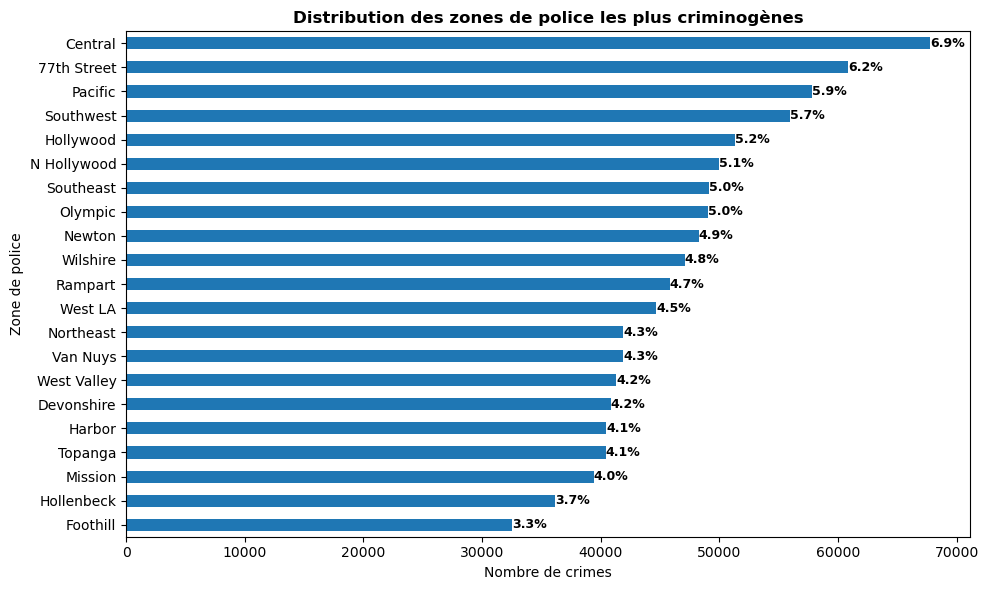

'\nLa zone de police la plus criminogéne est la zone Central, suivi de 77th Street, ensuite la zone Pacific.\n'

In [40]:
#=== Distribution des zones de police les plus criminogènes ===#

police_zone = df.groupby('AREA NAME').size().sort_values(ascending=False)

plt.figure(figsize=(10,6))
fig = police_zone.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Distribution des zones de police les plus criminogènes', fontweight='bold')
plt.xlabel("Nombre de crimes")
plt.ylabel("Zone de police")

total = police_zone.sum()
for i, value in enumerate(police_zone.values):       # Ajouter les étiquettes sur chaque barre
    percent = (value / total) * 100
    fig.text(value + 2, i, f"{percent:.1f}%", va='center', fontsize=9, fontweight='bold')
    
plt.tight_layout()
plt.show()

"""
La zone de police la plus criminogéne est la zone Central, suivi de 77th Street, ensuite la zone Pacific.
"""

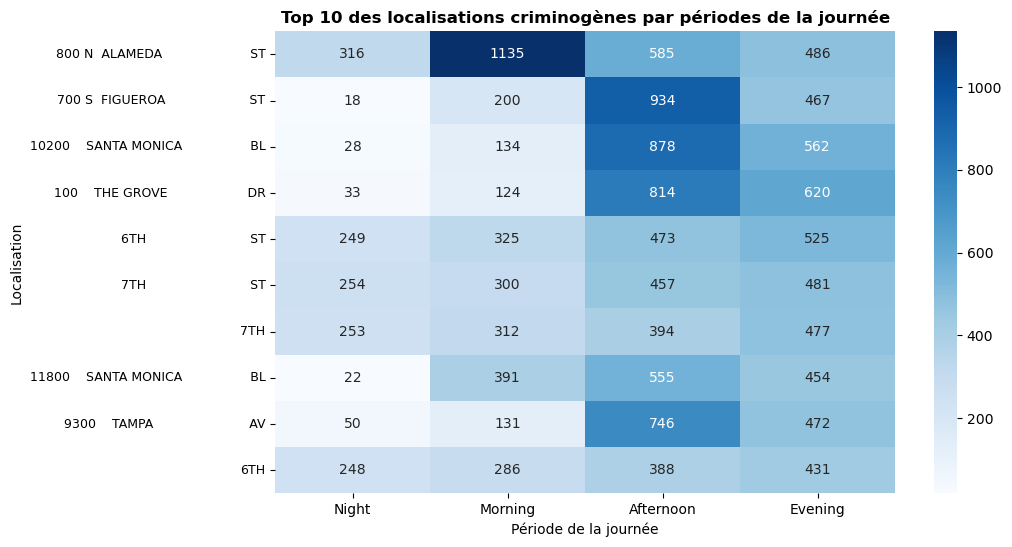

'\nLa heatmap montre que certaines zones concentrent les crimes à des moments clés de la journée. \n800 N Alameda Street atteint un pic majeur le matin, tandis que 700 S Figueroa et 10200 Santa Monica Blvd sont plus actives l’après-midi. \nLe soir reste modérément criminogène selon les zones, alors que la nuit affiche globalement les niveaux les plus faibles.\n'

In [41]:
#=== Distribution des crimes par périodes de la journée ===#

# Annee = occ_year
# Mois = occ_month
pivot = pd.pivot_table(df,
                       index='LOCATION',
                       columns='Daily Periods',
                       values='DR_NO',  # ou une autre colonne identifiant l'incident
                       aggfunc='count',
                       observed=False,
                       fill_value=0)
 
top_zones = df['LOCATION'].value_counts().head(10).index    # Trier par total et garder les 10 zones les plus fréquentes
pivot_reduit = pivot.loc[top_zones]
 
plt.figure(figsize=(10,6))
sns.heatmap(pivot_reduit, annot=True, fmt='d', cmap='Blues')
plt.title("Top 10 des localisations criminogènes par périodes de la journée", fontweight='bold')
plt.xlabel("Période de la journée")
plt.ylabel("Localisation")
plt.yticks(fontsize=9)
plt.show()

"""
La heatmap montre que certaines zones concentrent les crimes à des moments clés de la journée. 
800 N Alameda Street atteint un pic majeur le matin, tandis que 700 S Figueroa et 10200 Santa Monica Blvd sont plus actives l’après-midi. 
Le soir reste modérément criminogène selon les zones, alors que la nuit affiche globalement les niveaux les plus faibles.
"""

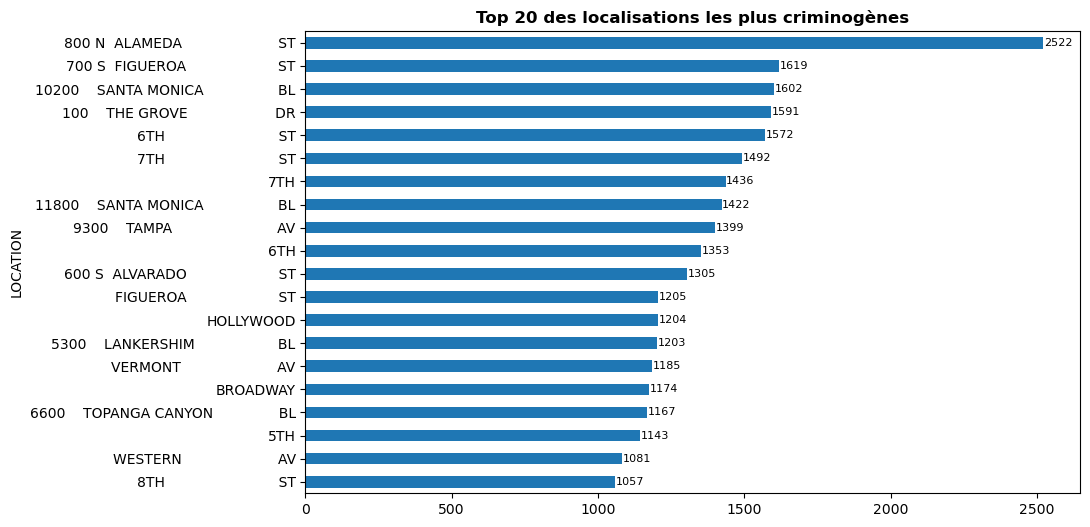

"\nLa localisation la plus criminogéne est 800 N ALAMEDA ST avec 1.5 fois plus d'infractions que son prédécesseur 700 S FIGUEROA ST.\n"

In [42]:
#=== Top 20 des localisations les plus criminogènes ===#

location = df.groupby('LOCATION').size().sort_values(ascending=False).head(20)
fig = location.plot(kind='barh', figsize=(10,6))
plt.title('Top 20 des localisations les plus criminogènes', fontweight='bold')
plt.gca().invert_yaxis()
for i, value in enumerate(location.values):       # Ajouter les étiquettes sur chaque barre
    plt.text(value + 2, i, str(value), va='center', fontsize=8)
plt.show()

"""
La localisation la plus criminogéne est 800 N ALAMEDA ST avec 1.5 fois plus d'infractions que son prédécesseur 700 S FIGUEROA ST.
"""

#### 2- Profil des victimes le plus touchées

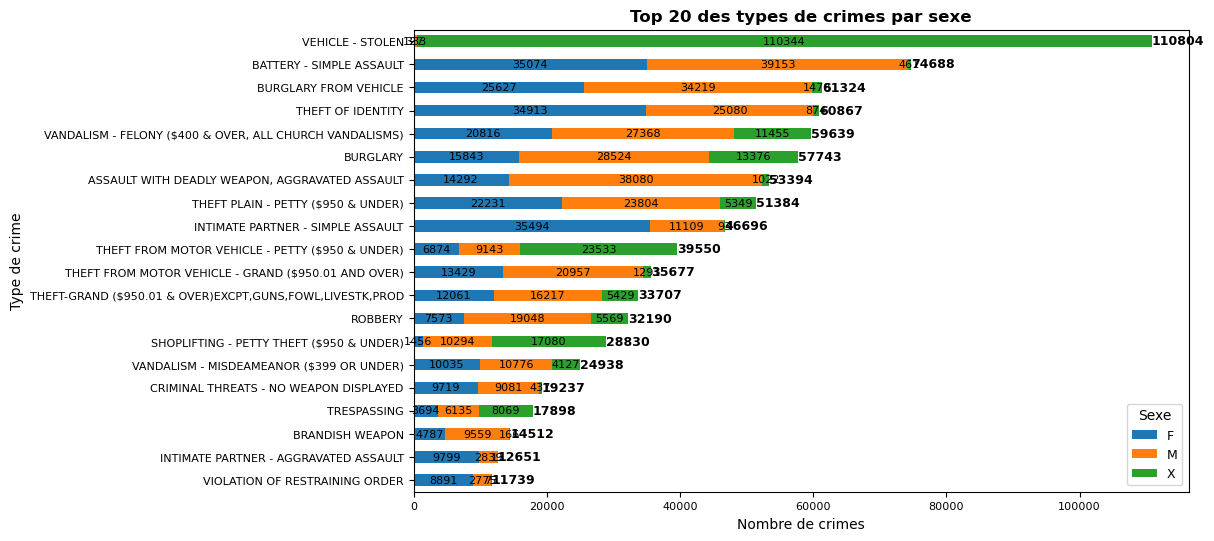

'\nLes infractions les plus prédominant dans la ville de LS sont le vol de véhicules dont la quasi-totalité des victimes sont de sexe inconnu.\nEnsuite nous, avons les agressions physiques simples avec presque une égale répartition chez les hommes et les femmes.\nAinsi de suite...\n'

In [43]:
#=== Top 20 du nombre de crimes par type et sexe ===#

#crime_sex = pd.crosstab(df['Crm Cd Desc'], df['Vict Sex'])
crime_sex = df.groupby(['Crm Cd Desc', 'Vict Sex']).size().unstack(fill_value=0)

# Sélection des 20 types de crimes les plus fréquents
top20 = crime_sex.sum(axis=1).sort_values(ascending=False).head(20)
crime_sex_top20 = crime_sex.loc[top20.index]

# Tracer un bar plot groupé
fig = crime_sex_top20.plot(kind='barh', figsize=(10,6), stacked=True)
plt.xlabel('Nombre de crimes', fontsize=10)
plt.ylabel('Type de crime', fontsize=10)
plt.title('Top 20 des types de crimes par sexe', fontweight='bold')
plt.gca().invert_yaxis()
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Sexe', fontsize=9)   

totals = crime_sex_top20.sum(axis=1)    # Ajouter les totaux pour chaque type de crime (au bout de la barre)
for i, total in enumerate(totals):
    fig.text(total + 2, i, str(total), va='center', fontsize=9, fontweight='bold')

for i, crime in enumerate(crime_sex_top20.index):   # --- Ajouter les étiquettes pour chaque segment (chaque sexe) ---
    cum_width = 0
    for sex in crime_sex_top20.columns:
        value = crime_sex_top20.loc[crime, sex]
        if value > 0:
            fig.text(cum_width + value/2, i, str(value), ha='center', va='center', fontsize=8, color='black')
            cum_width += value

plt.show()

"""
Les infractions les plus prédominant dans la ville de LS sont le vol de véhicules dont la quasi-totalité des victimes sont de sexe inconnu.
Ensuite nous, avons les agressions physiques simples avec presque une égale répartition chez les hommes et les femmes.
Ainsi de suite...
"""

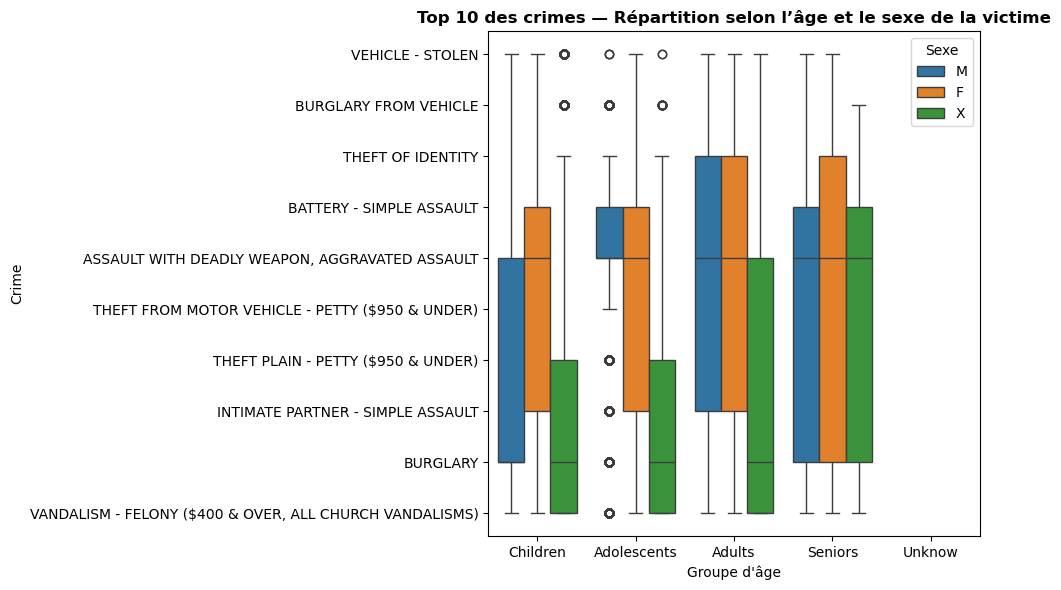

'\nLes crimes les plus fréquents touchent principalement des adultes, avec une présence comparable des victimes hommes et femmes, \ntandis que les enfants, adolescents, seniors et le sexe inconnu restent minoritaires selon le type de crime.\n'

In [44]:
top10_crimes = df['Crm Cd Desc'].value_counts().head(10).index

df_top10 = df[df['Crm Cd Desc'].isin(top10_crimes)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_top10, x='Age Group', y='Crm Cd Desc', hue='Vict Sex')
plt.title("Top 10 des crimes — Répartition selon l’âge et le sexe de la victime", fontweight='bold')
plt.xlabel("Groupe d'âge")
plt.ylabel("Crime")
plt.xticks(rotation=0)
plt.legend(title="Sexe", loc="upper right")
plt.tight_layout()
plt.show()

"""
Les crimes les plus fréquents touchent principalement des adultes, avec une présence comparable des victimes hommes et femmes, 
tandis que les enfants, adolescents, seniors et le sexe inconnu restent minoritaires selon le type de crime.
"""

In [45]:
# Dictionnaire de mapping des codes d'origine ethnique
descent_mapping = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}
 
# Application du mapping
df["Vict_Descent_Mapped"] = df["Vict Descent"].map(descent_mapping)

C:\Users\mbome\AppData\Local\Temp\ipykernel_16080\2361150858.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Vict_Descent_Mapped', 'Age Group', 'Vict Sex'])


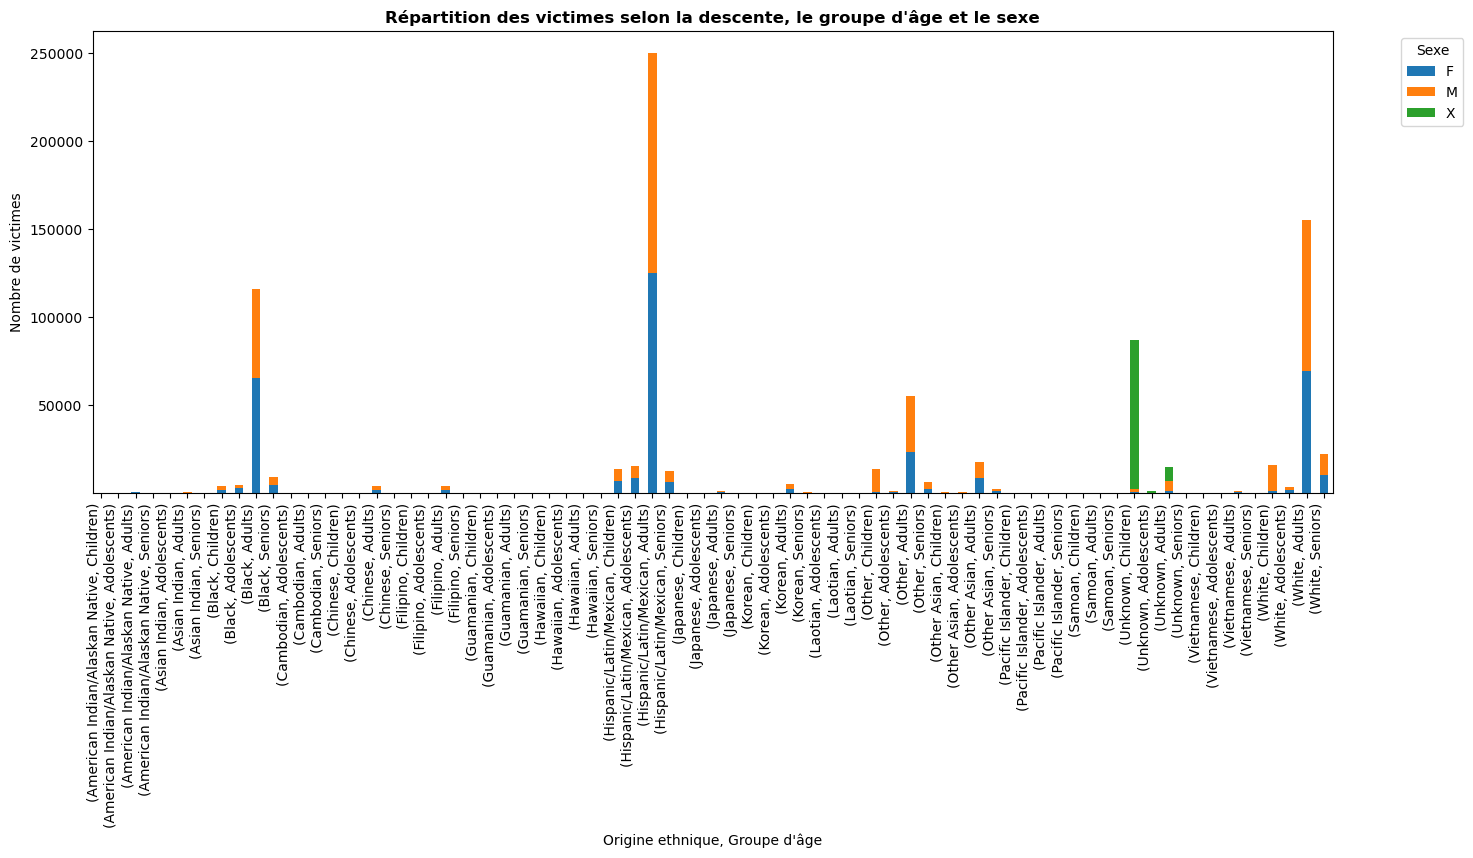

'\nLes victimes les plus touchées sont les adultes (presque égale répartition entre les hommes et les femmes) d\'origine ethnique "H", \nsuivi des adultes (presque égale répartition entre les hommes et les femmes) d\'origine ethnique "W", ensuite les adultes \n(plus de femmes que d\'hommes) d\'origine ethnique "B", etc.\nIl faut noter que nous avons également un grand nombre de victimes dont l\'origine ethnique, le groupe d\'âge et le sexe sont inconnus.\n'

In [46]:
#=== Répartition des victimes selon l'origine ethnique, l'âge et le sexe ===#

# Tableau croisé
pivot = pd.crosstab(
    [df['Vict_Descent_Mapped'], df['Age Group']],
    df['Vict Sex']
)

# DataFrame
cross = (
    df.groupby(['Vict_Descent_Mapped', 'Age Group', 'Vict Sex'])
    .size()                        
    .reset_index(name='Count')
)

pivot.plot(kind='bar', stacked=True, figsize=(16,6))
plt.title("Répartition des victimes selon la descente, le groupe d'âge et le sexe", fontweight='bold')
plt.xlabel("Origine ethnique, Groupe d'âge")
plt.ylabel("Nombre de victimes")
plt.xticks(rotation=90, ha='right')
plt.legend(title="Sexe", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

"""
Les victimes les plus touchées sont les adultes (presque égale répartition entre les hommes et les femmes) d'origine ethnique "H", 
suivi des adultes (presque égale répartition entre les hommes et les femmes) d'origine ethnique "W", ensuite les adultes 
(plus de femmes que d'hommes) d'origine ethnique "B", etc.
Il faut noter que nous avons également un grand nombre de victimes dont l'origine ethnique, le groupe d'âge et le sexe sont inconnus.
"""

#### 3- Facteurs influencant la nature, la gravité ou le statut d’un crime 

In [47]:
# Catégoriser des crimes
def categorize_crime(desc):
    desc = desc.upper()
 
    # ---------------------- SEX CRIME ----------------------
    if any(word in desc for word in [
        "RAPE", "SEX", "MOLEST", "LEWD", "SODOMY",
        "INDECENT", "CHILD PORN", "BEASTIALITY",
        "ORAL COPULATION", "PIMPING", "PANDERING"
    ]):
        return "Sex Crime"
 
    # --------------------- VIOLENT CRIME --------------------
    if any(word in desc for word in [
        "ASSAULT", "BATTERY", "HOMICIDE", "MURDER", "MANSLAUGHTER",
        "KIDNAPPING", "CHILD STEALING", "CHILD NEGLECT",
        "HUMAN TRAFFICKING", "INVOLUNTARY SERVITUDE",
        "THREATS", "STALKING", "FALSE IMPRISONMENT",
        "LYNCHING", "LINCHING", "PROWLER", "PEEPING TOM",
        "RESTRAINING ORDER", "TRESPASSING", "DISRUPT"
    ]):
        return "Violent Crime"
 
    # ---------------------- PROPERTY CRIME ------------------
    if any(word in desc for word in [
        "THEFT", "STOLEN", "BURGLARY", "SHOPLIFT", "PICKPOCKET",
        "PURSE SNATCHING", "DOCUMENT WORTHLESS",
        "VANDALISM", "TILL TAP", "PROPERTY - DAMAGE",
        "DRUNK ROLL", "LARCENY"
    ]):
 
        return "Property Crime"
 
    # ---------------------- VEHICLE CRIME -------------------
    if any(word in desc for word in [
        "VEHICLE", "AUTO", "CAR", "SCOOTER",
        "DRIVING WITHOUT OWNER CONSENT", "DWOC",
        "RECKLESS DRIVING", "DRUNK DRIVING", "DUI"
    ]):
        return "Vehicle Crime"
 
    # ---------------------- WEAPON CRIME --------------------
    if any(word in desc for word in [
        "WEAPON", "FIREARM", "GUN", "BRANDISH",
        "BOMB", "EXPLOSIVE", "ARSON", "BOMBING"
    ]):
        return "Weapon Crime"
 
    # ---------------------- FRAUD / FINANCIAL --------------
    if any(word in desc for word in [
        "FRAUD", "FORGERY", "COUNTERFEIT", "BRIBERY",
        "SCAM", "CHECK", "CREDIT CARD", "EMBEZZLEMENT"
    ]):
        return "Fraud / Financial Crime"
     # ---------------------- DRUG / NARCOTIC -----------------
    if any(word in desc for word in [
        "DRUG", "NARCOTIC", "CONTROLLED SUBSTANCE",
        "POSSESSION OF DRUG", "POSS DRUG"
    ]):
        return "Drug / Narcotic Crime"
 
    # ---------------------- OTHER ---------------------------
    return "Other"
 
df['Crime Category'] = df['Crm Cd Desc'].apply(categorize_crime)

In [48]:
# Réduire les catégories trop rares
df_reduced = df_original.copy()

def reduce_categories(col, top_n=5):
    top = col.value_counts().index[:top_n]
    return col.where(col.isin(top), 'Other')

df_reduced['Weapon Desc'] = reduce_categories(df_reduced['Weapon Desc'], top_n=5)
df_reduced['Premis Desc'] = reduce_categories(df_reduced['Premis Desc'], top_n=10)
df_reduced['Mocodes']     = reduce_categories(df_reduced['Mocodes'], top_n=15)

In [49]:
""""
# DataFrame
cross = (
    df.groupby(['Mocodes', 'Weapon Desc', 'Crime Category'])
    .size()                        
    .reset_index(name='Count')
)

cross.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Top 10 types de crime par sexe (empilé)')
plt.xlabel('Type de crime')
plt.ylabel('Nombre d’incidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexe de la victime')
plt.tight_layout()
plt.show()
"""

'"\n# DataFrame\ncross = (\n    df.groupby([\'Mocodes\', \'Weapon Desc\', \'Crime Category\'])\n    .size()                        \n    .reset_index(name=\'Count\')\n)\n\ncross.plot(kind=\'bar\', stacked=True, figsize=(10,6))\nplt.title(\'Top 10 types de crime par sexe (empilé)\')\nplt.xlabel(\'Type de crime\')\nplt.ylabel(\'Nombre d’incidents\')\nplt.xticks(rotation=45, ha=\'right\')\nplt.legend(title=\'Sexe de la victime\')\nplt.tight_layout()\nplt.show()\n'

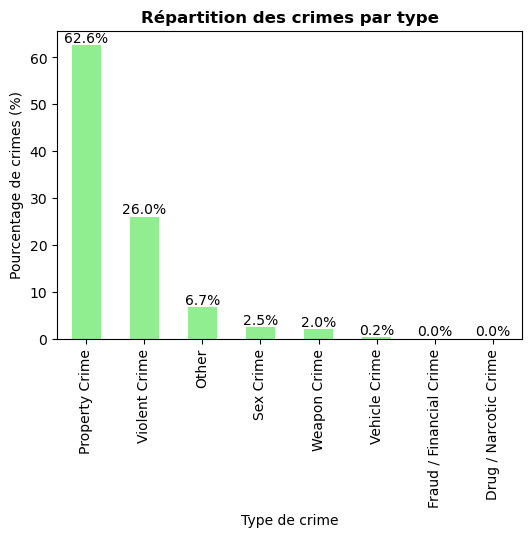

'\nLa majeur partie des crimes (62,6%) sont ceux contre les biens, suivi des crimes vilolents (26,0%).\nLes autres types de crimes sont tous de moins de 5%.\n'

In [50]:
#=== Répartition des crimes par type ===#

type_counts = df['Crime Category'].value_counts()

type_counts_pct = type_counts / type_counts.sum() * 100 # Convertir en pourcentage

plt.figure(figsize=(6,4))
fig = type_counts_pct.plot(kind='bar', color='lightgreen')
plt.title("Répartition des crimes par type", fontweight='bold')
plt.xlabel("Type de crime")
plt.ylabel("Pourcentage de crimes (%)")
plt.xticks(rotation=90, ha='center')
for p in fig.patches:                       # Afficher les étiquettes
    value = p.get_height()
    fig.annotate(f'{value:.1f}%', 
                (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom')
plt.show()

"""
La majeur partie des crimes (62,6%) sont ceux contre les biens, suivi des crimes vilolents (26,0%).
Les autres types de crimes sont tous de moins de 5%.
"""

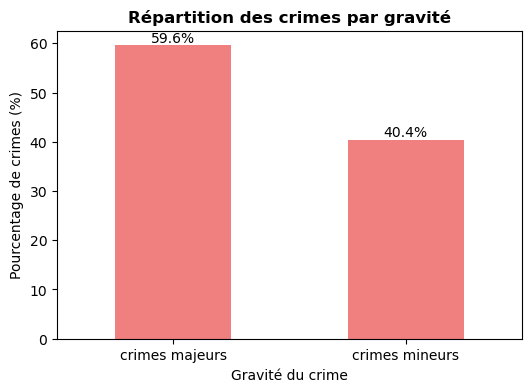

'\nNous avons plus de crimes majeurs (59,6%) que crimes mineurs (40,4%) dans la ville de LS.\n'

In [51]:
#=== Répartition des crimes par gravité ===#

# Labeliser la variable "Part 1-2"
severity_mapping = {
    1: "crimes majeurs",
    2: "crimes mineurs"
}
df["Severity"] = df["Part 1-2"].map(severity_mapping)

severity_counts = df['Severity'].value_counts()

severity_counts_pct = severity_counts / severity_counts.sum() * 100 # Convertir en pourcentage

plt.figure(figsize=(6,4))
fig = severity_counts_pct.plot(kind='bar', color='lightcoral')
plt.title("Répartition des crimes par gravité", fontweight='bold')
plt.xlabel("Gravité du crime")
plt.ylabel("Pourcentage de crimes (%)")
plt.xticks(rotation=0, ha='center')
for p in fig.patches:                       # Afficher les étiquettes
    value = p.get_height()
    fig.annotate(f'{value:.1f}%', 
                (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom')
plt.show()

"""
Nous avons plus de crimes majeurs (59,6%) que crimes mineurs (40,4%) dans la ville de LS.
"""

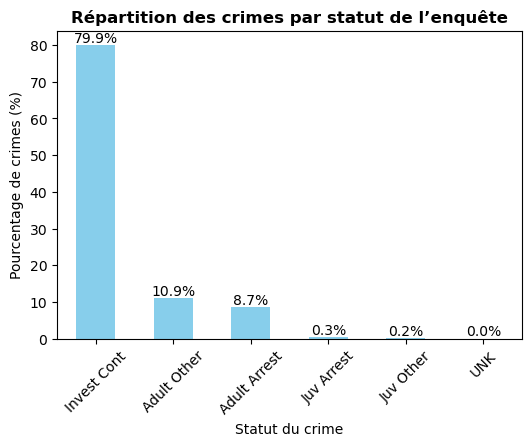

"\nPresque 80% des crimes perpétrés sont toujours en cours d'investigation.\nEt seulement 9% des auteurs sont arrétés. \n"

In [52]:
#=== Répartition des crimes par type par statut de l’enquête ===#

status_counts = df['Status Desc'].value_counts()

status_counts_pct = status_counts / status_counts.sum() * 100 # Convertir en pourcentage

plt.figure(figsize=(6,4))
fig = status_counts_pct.plot(kind='bar', color='skyblue')
for p in fig.patches:                       # Afficher les étiquettes
    value = p.get_height()
    fig.annotate(f'{value:.1f}%', 
                (p.get_x() + p.get_width() / 2, value),
                ha='center', va='bottom')
plt.title("Répartition des crimes par statut de l’enquête", fontweight='bold')
plt.xlabel("Statut du crime")
plt.ylabel("Pourcentage de crimes (%)")
plt.xticks(rotation=45, ha='center')
plt.show()

"""
Presque 80% des crimes perpétrés sont toujours en cours d'investigation.
Et seulement 9% des auteurs sont arrétés. 
"""

In [53]:
#=== Tests statistiques ===#

# H0 : Il n’existe aucune association entre le type de crime et l’arme utilisée
# H1 : Il existe une association entre le type de crime et l’arme utilisée

# Decision :
#           Si p > 0.05 → tu ne rejettes pas H₀, ie pas de lien statistiquement significatif entre crime et arme.
#           Si p ≤ 0.05 → tu rejettes H₀, ie le type de crime est associé à l’arme utilisée.

from scipy.stats import chi2_contingency, f_oneway, kruskal

"""
Catégorie vs catégorie : test du khi² (chi-square)
Numéral vs catégoriel : ANOVA ou Kruskal-Wallis (non-paramétrique)
"""

'\nCatégorie vs catégorie : test du khi² (chi-square)\nNuméral vs catégoriel : ANOVA ou Kruskal-Wallis (non-paramétrique)\n'

In [54]:
# Chi² "variable_cat" vs Crime category

ct = pd.crosstab(df['Crime Category'], df['AREA NAME'])
chi2, p, dof, ex = chi2_contingency(ct)
print(f"chi2 = {chi2} ; p-value = {p:.2e}")

""""
Le type d’arme est lié au type de crime.
Le modus operandi dépend du type de crime.
Le type de lieu est associé au type de crime.
La zone de police est associé au type de crime.
La gravité d'un crime est lié au type de crime.
Le Statut d'un crime est lié au type de crime.
"""

chi2 = 23556.11396040409 ; p-value = 0.00e+00


'"\nLe type d’arme est lié au type de crime.\nLe modus operandi dépend du type de crime.\nLe type de lieu est associé au type de crime.\nLa zone de police est associé au type de crime.\nLa gravité d\'un crime est lié au type de crime.\nLe Statut d\'un crime est lié au type de crime.\n'

In [55]:
# Chi² "variable_cat" vs Crime category

ct = pd.crosstab(df['Crime Category'], df['Vict Sex'])
chi2, p, dof, ex = chi2_contingency(ct)
print(f"chi2 = {chi2} ; p-value = {p:.2e}")

""""
Le type d’arme est lié au type de crime.
Le modus operandi dépend du type de crime.
Le type de lieu est associé au type de crime.
La zone de police est associé au type de crime.
La gravité d'un crime est lié au type de crime.
Le Statut d'un crime est lié au type de crime.
Le sexe de la victime est lié au type de crime.
"""

chi2 = 111203.07783764187 ; p-value = 0.00e+00


'"\nLe type d’arme est lié au type de crime.\nLe modus operandi dépend du type de crime.\nLe type de lieu est associé au type de crime.\nLa zone de police est associé au type de crime.\nLa gravité d\'un crime est lié au type de crime.\nLe Statut d\'un crime est lié au type de crime.\nLe sexe de la victime est lié au type de crime.\n'

In [56]:
# Kruskal-Wallis Vict Age vs Crime category

df_anova = df.dropna(subset=['Vict Age', 'Crime Category'])     # S'assurer que l'on a pas de valeurs manquantes

groups = [group['Vict Age'].values for name, group in df_anova.groupby('Crime Category')]     # Créer une liste des groupes
F_stat, p_value = kruskal(*groups)
print(f"F-statistic = {F_stat:.4f} ; p-value = {p_value:.3f}")

""""
L'age de la victime est lié au type de crime.
"""

F-statistic = 43898.2722 ; p-value = 0.000


'"\nL\'age de la victime est lié au type de crime.\n'

In [57]:
# ANOVA Signaling Delay vs Status Desc

df_anova = df.dropna(subset=['Signaling Delay', 'Status Desc'])     # S'assurer que l'on a pas de valeurs manquantes

groups = [group['Signaling Delay'].values for name, group in df_anova.groupby('Status Desc')]     # Créer une liste des groupes
F_stat, p_value = f_oneway(*groups)
print(f"F-statistic = {F_stat:.4f} ; p-value = {p_value:.6f}")
# Si les données ne sont pas normales, on utilise ANOVA non paramétrique ou Kruskal-Wallis (kruskal)  au lieu de ANOVA (f_oneway)

""""
Le délai moyen de signalement des crimes est lié au statut de l’enquête.
"""

F-statistic = 190.6732 ; p-value = 0.000000


'"\nLe délai moyen de signalement des crimes est lié au statut de l’enquête.\n'

C:\Users\mbome\AppData\Local\Temp\ipykernel_16080\519030536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Status Desc', y='Signaling Delay', palette="tab10", errorbar=None)


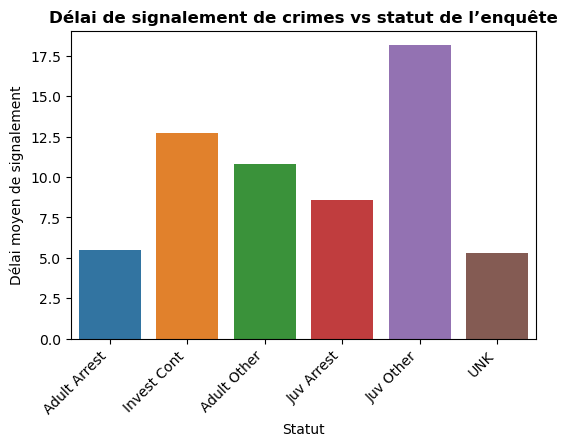

'\nLes crimes non résolus ont un délai moyen de signalement de plus de 10 jours.\n'

In [58]:
#=== Délai de signalement de crimes vs Statut de l’enquête ===#

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Status Desc', y='Signaling Delay', palette="tab10", errorbar=None)
plt.xlabel("Statut")
plt.ylabel("Délai moyen de signalement")
plt.title("Délai de signalement de crimes vs statut de l’enquête", fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

"""
Les crimes non résolus ont un délai moyen de signalement de plus de 10 jours.
"""

#### 4- Prédiction du type d'un crime (multi-classes) en fonctions variables contextuelles

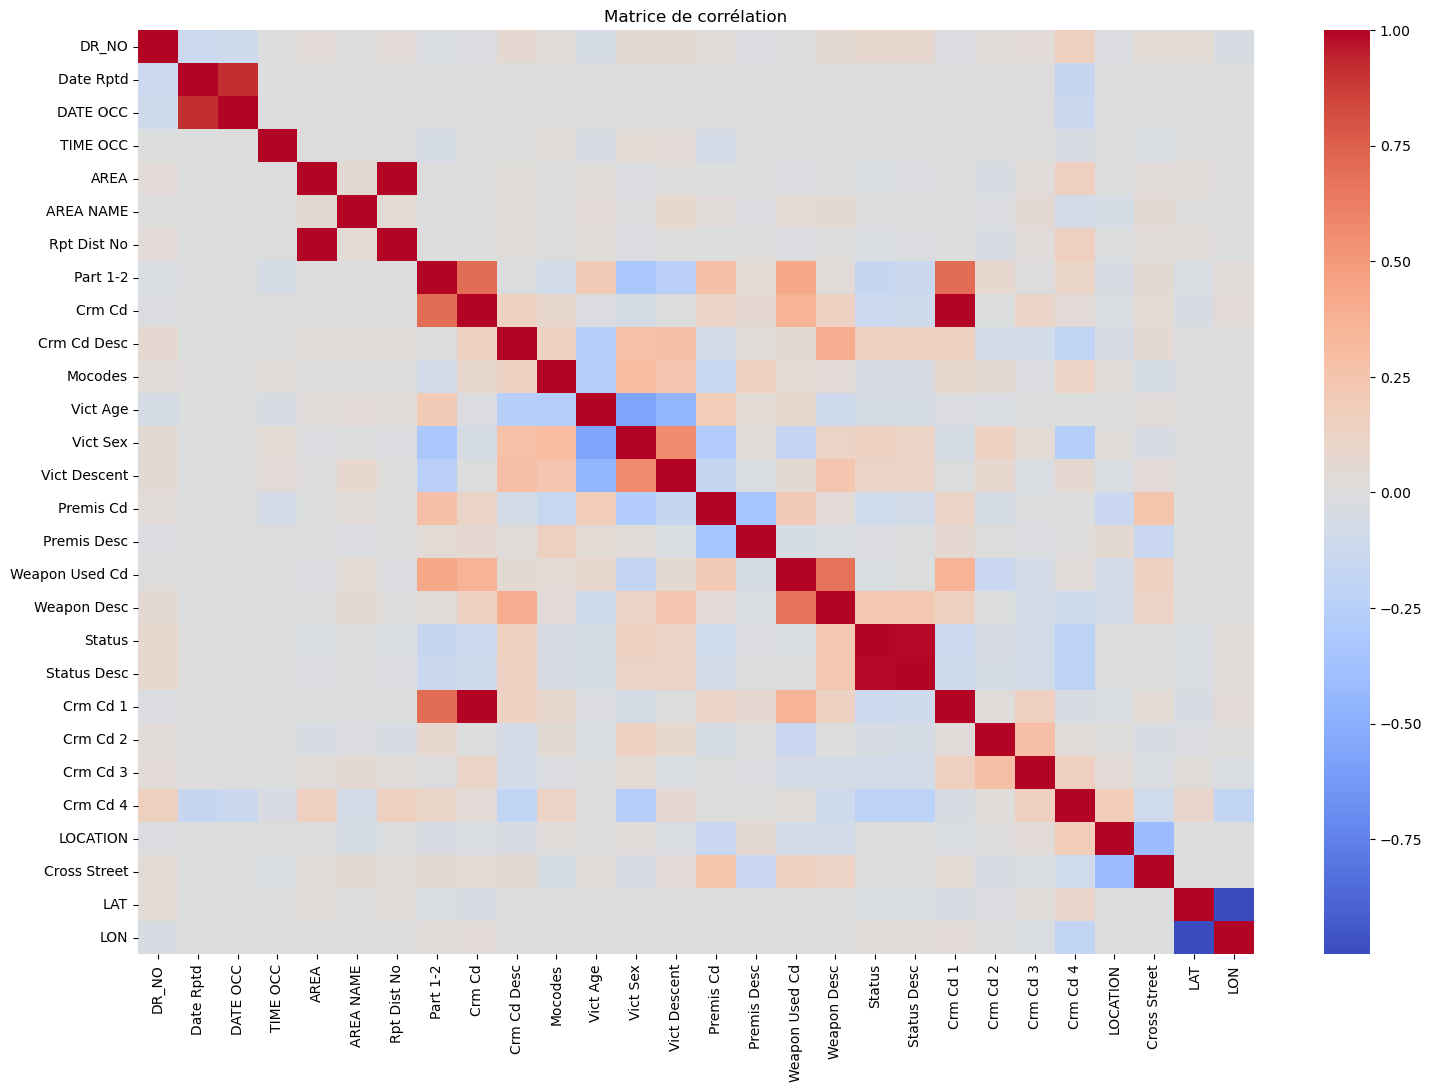

In [59]:
# Matrice de corrélation
from sklearn.preprocessing import LabelEncoder

df_encoded = df_original.copy()

cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

plt.figure(figsize=(18, 12))
plt.title("Matrice de corrélation")
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier   # ⬅️ nouveau

# Regroupement des classes rares
counts = df['Crm Cd Desc'].value_counts()
top = counts[counts >= 10000].index   # seuil arbitraire
df['Crime_top'] = df['Crm Cd Desc'].where(df['Crm Cd Desc'].isin(top), 'Other')

# Sélection des caractéristiques
features = ['AREA NAME', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc', 'Signaling Delay']

# Définition des variables explicatives et de la cible
X = df[features].copy()
y = df['Crime_top'].copy()

# Encodage
cat_cols = ['AREA NAME', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc']

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Pas de normalisation/standardisation nécessaire (XGBoost est aussi basé sur des arbres)

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 🔥 Modèle XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,        # nombre d’arbres
    max_depth=8,            # profondeur des arbres
    learning_rate=0.1,      # taux d’apprentissage
    subsample=0.8,          # échantillonnage des lignes
    colsample_bytree=0.8,   # échantillonnage des colonnes
    objective='multi:softmax',  # car c’est de la classification multi-classes
    num_class=len(np.unique(y)),
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

# Entraînement
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred = xgb_model.predict(X_test)

# Évaluation
print("Exactitude :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Exactitude : 0.6802796548074574

Rapport de classification :
              precision    recall  f1-score   support

           0       0.62      0.71      0.66     10679
           1       0.66      0.85      0.74     14938
           2       0.56      0.41      0.47      2902
           3       0.67      0.73      0.70     11549
           4       0.61      0.75      0.67     12265
           5       0.81      0.89      0.85      3847
           6       0.54      0.20      0.29      2530
           7       0.74      0.81      0.77      9339
           8       0.65      0.55      0.60     27034
           9       0.68      0.54      0.60      6438
          10       0.70      0.88      0.78      5766
          11       0.61      0.58      0.60      7135
          12       0.47      0.07      0.13      7910
          13       0.90      0.93      0.92     12173
          14       0.50      0.59      0.54     10277
          15       0.43      0.20      0.28      6741
          16       0